# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [575]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [680]:
# Write your code here
print(df.shape) # printing the shape of the dataframe (rows, columns)

(1898, 9)


#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [577]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The datatypes are: in64, object, float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [578]:
# Write your code here
df['rating'].value_counts() # checking for missing values in the ratings column
df['rating'] = df['rating'].replace(['Not given'],np.nan) # replaces missing value with proper null variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There were 736 rows in the rating column with 'Not given' as the value. I replaced them with NaN in the dataframe. (I did not replace the values with the median or average because I did not want to skew my data too heavily in one direction)


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [678]:
# Write your code here
min = df["food_preparation_time"].min() # finds the minimum value in the food_prep column
mean = df["food_preparation_time"].mean() # calculates the average value of the food_prep column
max = df["food_preparation_time"].max() # finds the maximum value in the food_prep column

# Printing the values out
print("food Prep Min: ", min) 
print("food Prep Average: ", mean)
print("food Prep Max: ", max)

food Prep Min:  20
food Prep Average:  27.371970495258168
food Prep Max:  35


#### Observations: The minimum amount of time for food prep is 20 minutes, the average is ~27.4 minutes, and the max is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [677]:
# Write the code here

missing = df.loc[df['rating'].isna()].shape[0] # locating all the rows in the dataframe where the "rating == Not given". Shape[0] returns the total number of rows in this grouping
print('missing ratings = ', missing,f' which is {(missing/df.shape[0])*100} percent of orders')

missing ratings =  736  which is 38.77766069546891 percent of orders


#### Observations: There are 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Observations on Order ID:

In [676]:
# Getting the amount of unique orders
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056],
      shape=(1898,))

* Every order ID is unique, which means there are no duplicate orders/rows in this data

#### Observations on customer ID: 

In [675]:
# Write the code here
frequency = df['customer_id'].value_counts() # getting the frequency of each customer

i = 1
while i <= frequency.max(): # aggregating customers by how many times they used the app
    freq = frequency[frequency == i].shape[0]
    percent = (freq/frequency.shape[0]) * 100
    print(f'customers that used the app {i} times: ', freq,' == ',round(percent,3),'%')
    i+=1

print(f"most frequent customer ordered who {i-1} times is ", frequency[frequency == i-1].index[0])




customers that used the app 1 times:  784  ==  65.333 %
customers that used the app 2 times:  267  ==  22.25 %
customers that used the app 3 times:  83  ==  6.917 %
customers that used the app 4 times:  33  ==  2.75 %
customers that used the app 5 times:  19  ==  1.583 %
customers that used the app 6 times:  6  ==  0.5 %
customers that used the app 7 times:  4  ==  0.333 %
customers that used the app 8 times:  1  ==  0.083 %
customers that used the app 9 times:  1  ==  0.083 %
customers that used the app 10 times:  1  ==  0.083 %
customers that used the app 11 times:  0  ==  0.0 %
customers that used the app 12 times:  0  ==  0.0 %
customers that used the app 13 times:  1  ==  0.083 %
most frequent customer ordered who 13 times is  52832


* 65% of customers only ordered through the app 1 time
* 22% ordered 2 times
* 7% ordered 3 times
* about 3% ordered 4 times
* 2% ordered 5 times
* those that ordered over 6+ times make up about 1% of orders

#### Observations on Restaurant name:

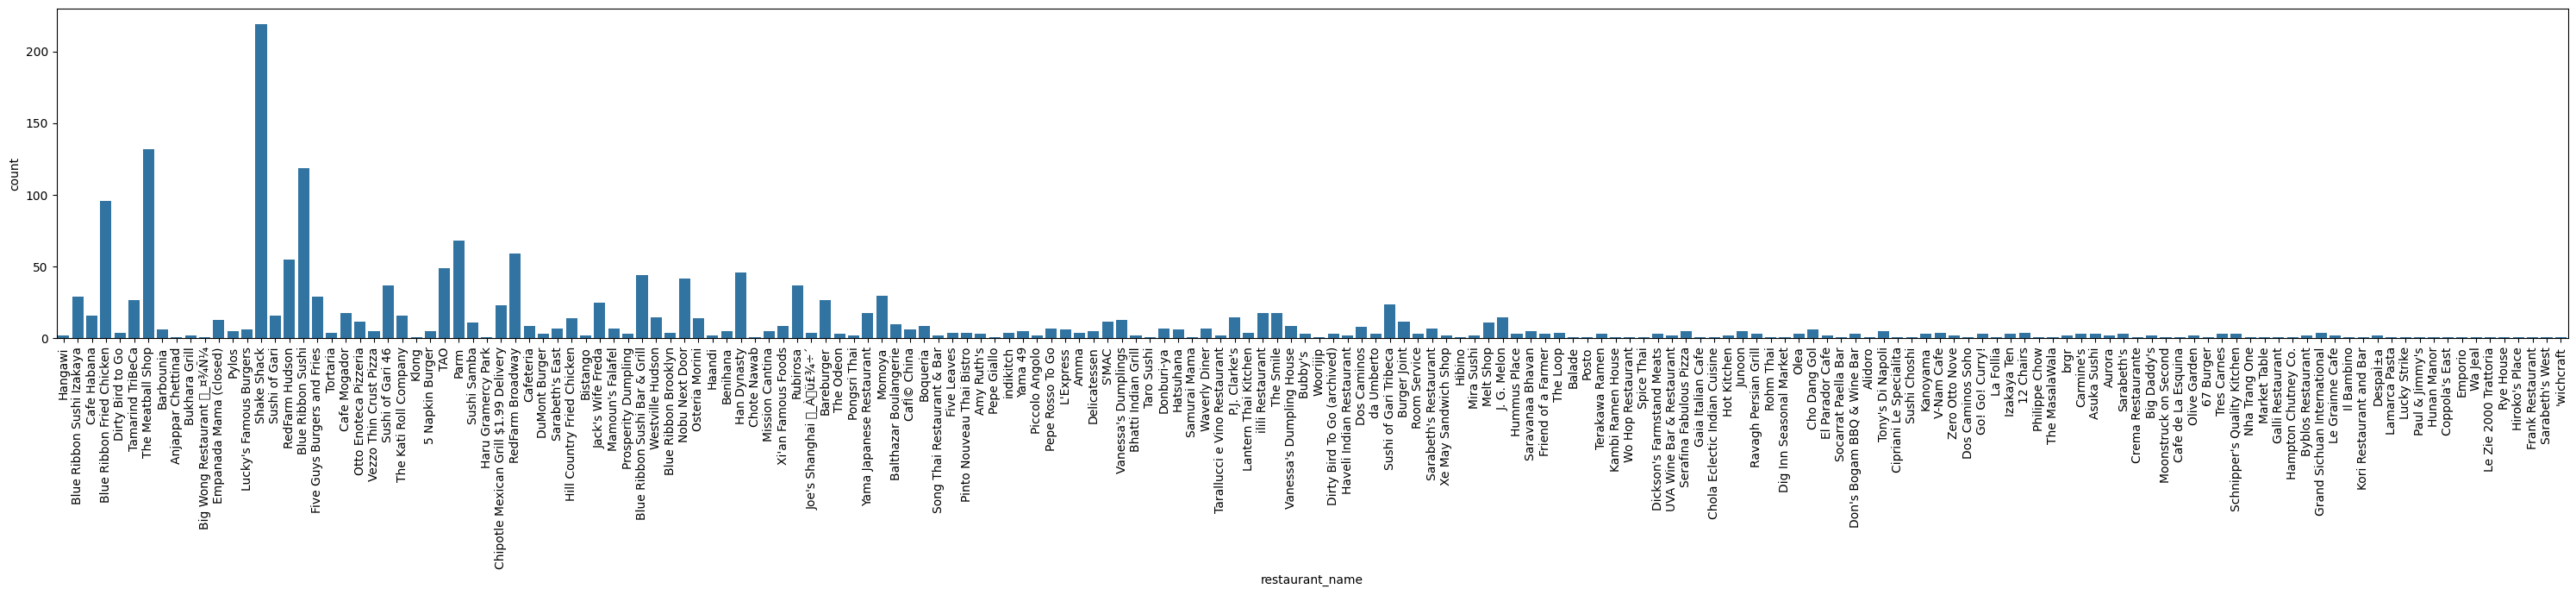

In [674]:
# Plotting bar graph for resturaunt names
plt.figure(figsize=(30,7))
sns.countplot(data=df,x="restaurant_name")
plt.xticks(rotation=90);
plt.tight_layout()


In [584]:
freq_res = df['restaurant_name'].value_counts() # the counts for each restaurant
freq_res_dist = df['restaurant_name'].value_counts(normalize=True) # the percentages for each restaurant

#  prints the most frequented restaurant's name and percent
print(freq_res[:1])
print('-'*50)
print(freq_res_dist[:1]*100)

#  prints the number and percentage of restaurants with order counts between 150 and 100
print('\n')
between_100_150 = freq_res[(freq_res< 150) & (freq_res >= 100)]
between_100_150_perc = freq_res_dist[between_100_150.index].sum()
print(between_100_150.shape[0],',',between_100_150_perc*100)
print('\n')

#  prints the number and percentage of restaurants with order counts between 100 and 50
between_100_50 = freq_res[(freq_res< 100) & (freq_res >= 50)]
between_100_50_perc = freq_res_dist[between_100_50.index].sum()
print(between_100_50.shape[0],',',between_100_50_perc*100)
print('\n')

#  prints the number and percentage of restaurants with order counts less than 50
less_than_50 = freq_res[(freq_res< 50)]
less_than_50_perc = freq_res_dist[less_than_50.index].sum()
print(less_than_50.shape[0],',',less_than_50_perc*100)



restaurant_name
Shake Shack    219
Name: count, dtype: int64
--------------------------------------------------
restaurant_name
Shake Shack    11.538462
Name: proportion, dtype: float64


2 , 13.22444678609062


4 , 14.64699683877766


171 , 60.590094836670175


* Shake Shack is the most frequented restaurant with 219 orders and makes up 11.5% of all orders through the app. It is the only restaurant above 150 orders 
* There are 2 restaurants with orders between 150 and 100, they make up 13.2% of orders
* There are 4 restaurants with orders between 100 and 50, they make up 14.6% of orders
* There are 171 restaurants with orders under 50, they make up 60.6% of orders

#### Observations on Cuisine Type:

<Axes: xlabel='cuisine_type', ylabel='count'>

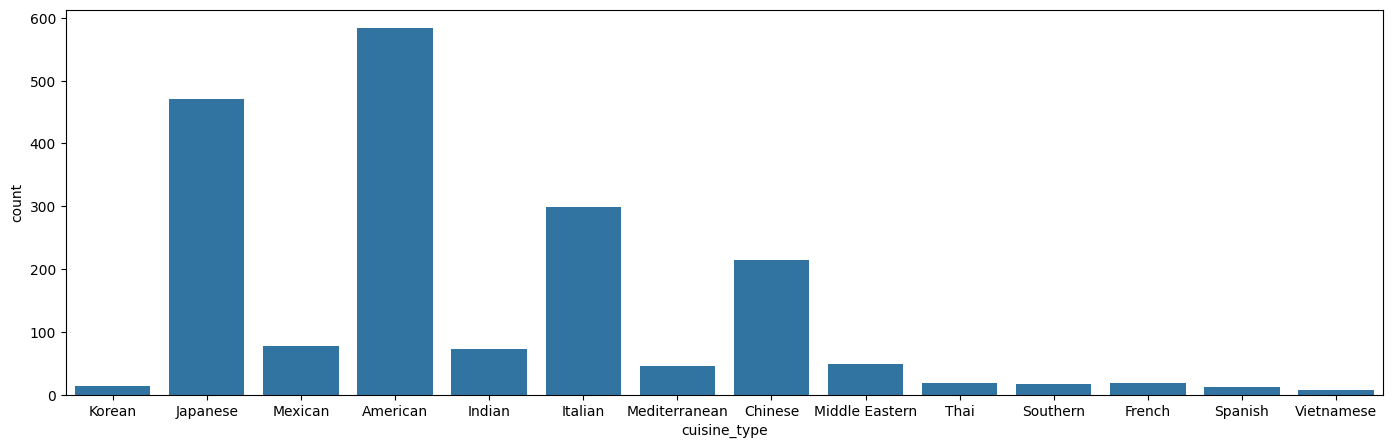

In [673]:
# plotting bar graph for cuisine type
plt.figure(figsize=(17,5))
sns.countplot(data=df,x='cuisine_type')

In [672]:
df['cuisine_type'].value_counts(normalize=True)*100 # returning percentages for cuisine type

cuisine_type
American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: proportion, dtype: float64

* American is the most popular cuisine and makes up 30.8% of orders
* Vietnamese is the least popular cuisine and makes up 0.37% of orders
* cusines ordered by frequency (high to low) : [American, Japanese, Italian, Chinese, Mexican, Indian, Middle Eastern, Mediterranean, Thai, French, Southern, Korean, Spanish, Vietnamese]

#### Observations on Order Costs: 

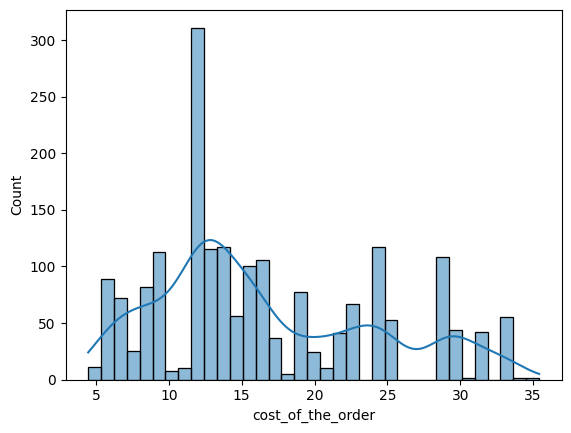

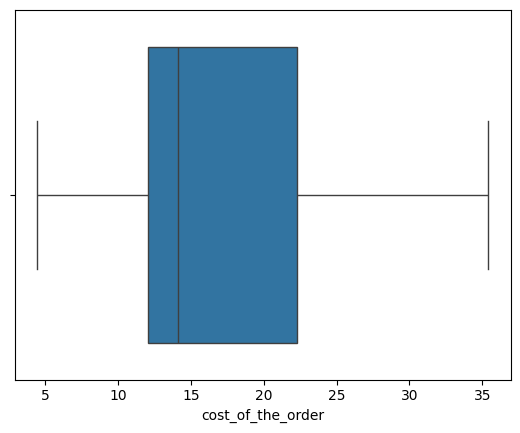

In [671]:
# plotting histogram and box graph for order cost
sns.histplot(data=df,x='cost_of_the_order',kde=True, bins=35)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order');

In [670]:
df['cost_of_the_order'].describe() # returning descriptive data for order costs

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

* The distribution is skewed to the right
* There are no outliers according to the box plot
* The interquartile range of orders costs is between ~12 dollars and ~23 dollars
* the median cost is closer to the Q1 value and is around $14
* according to the histogram, the price with the most orders is about $12


#### Observations on days of the week: 

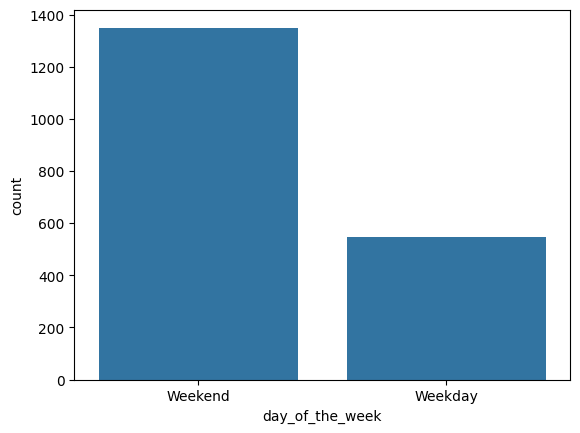

In [669]:
# ploting bar graph for day_of_the_week
sns.countplot(data=df,x='day_of_the_week');

* the weekend orders appear to be over double the amount of weekday orders
* there are almost 1400 weekend orders, and around 600 weekday orders

#### Observations on rating: 

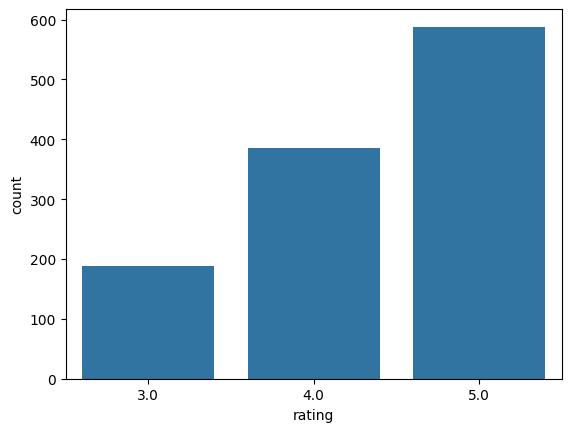

In [668]:
# ploting bar graph for ratings
sns.countplot(df,x='rating');

In [667]:
df['rating'].value_counts(normalize=True)*100 # returning percentage of each rating

rating
5.0    50.602410
4.0    33.218589
3.0    16.179002
Name: proportion, dtype: float64

* according to the graph, over half of orders recieve a score of 5
* according to the graph there are no ratings below a score of 3; it may be the case that customers treat 5 as "good", 4 as "ok", and 3 as "bad"

#### Observations on food prep time: 

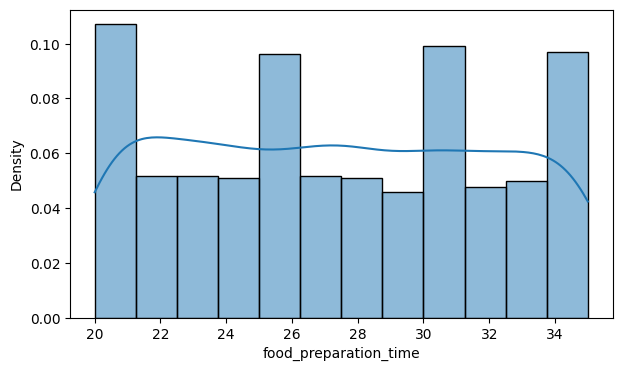

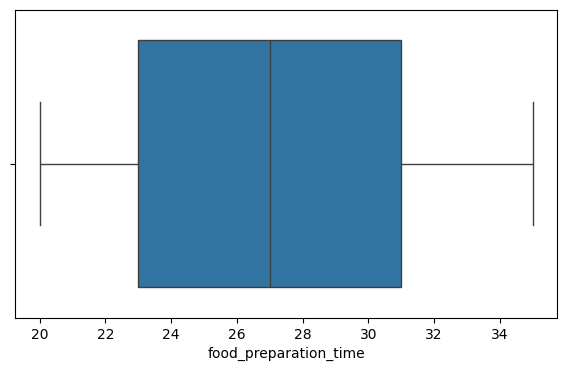

In [664]:
# plotting histogram and box graph for food prep time

plt.figure(figsize=(7,4))
sns.histplot(df,x='food_preparation_time', stat='density', kde=True);
plt.show()
plt.figure(figsize=(7,4))
sns.boxplot(df,x='food_preparation_time');
plt.show()


In [666]:
df['food_preparation_time'].describe() # returning descriptive data for food prep time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

* Around 10% of the prep time is at 20 mins, another ~10% at 26 mins, another ~10% at 30 mins, another ~10% at 34 mins. The rest of the times are around the 5% mark
* The KDE has a near flat plateau across the values 
* according to box plot, the data is spread out almost evenly through the range, but there is a slight right-skew

#### Observations on food delivery time: 

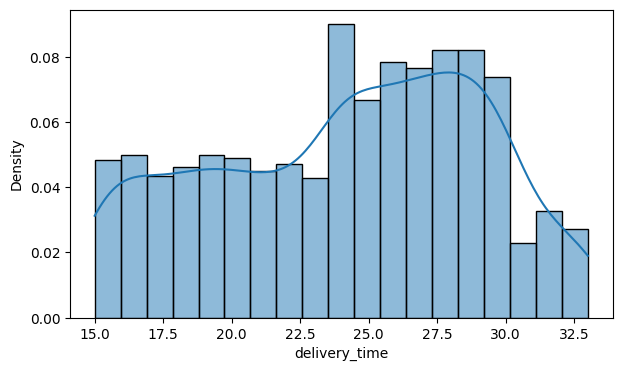

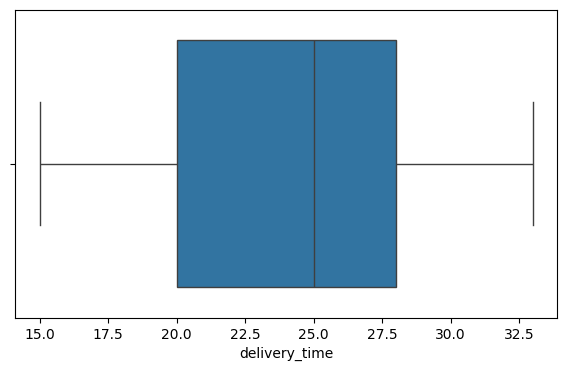

In [665]:
# plotting histogram and box graph for delivery time
plt.figure(figsize=(7,4))
sns.histplot(df,x='delivery_time', stat='density', kde=True, bins=19);
plt.show()
plt.figure(figsize=(7,4))
sns.boxplot(df,x='delivery_time');
plt.show()

In [663]:
df['delivery_time'].describe() # returning descriptive date for delivery time column

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

* The median delivery time is 25 minutes
* The graph has a left-skew
* there is a large drop-off for deliveries that take 30+ minutes


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [662]:
# Write the code here
frequency = df['restaurant_name'].value_counts()[:5]
print(frequency)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: The Top 5 most frequented resturaunt are [Shake Shack, The Meatball Shop, Blue Ribbon Sushi ,Blue Ribbon Fried Chicken, Parm]. This list is in order from left to right


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [661]:
# Write the code here
weekends = df.loc[df['day_of_the_week'] == "Weekend"] # limits data to only weekend orders
weekends['cuisine_type'].value_counts() # counts up the orders for each cuisine type

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations: The most popular cuisine on weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [660]:
# Write the code here
num = df.loc[df['cost_of_the_order'] > 20].shape[0] # get the number of orders over 20 dollars 
denom = df.shape[0] # get the total number of orders 
print("num: ", num)
print("denom: ", denom)
print("percent over $20 = ", round((num/denom)*100,2)) 


num:  555
denom:  1898
percent over $20 =  29.24


#### Observations: about 29.24 percent of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [659]:
# Write the code here
df["delivery_time"].mean() # returns the averge of all the values in the delivery_time column

np.float64(24.161749209694417)

#### Observations: The mean delivery time is about 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [658]:
# Write the code here
df['customer_id'].value_counts()[:3] # counts the orders for each customer ID and returns a series of counts associated with the IDs. Also, [:3] limits Series to first 3 elements

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations: The 3 most frequent customers are [52832, 47440, 83287]. In order from left to right.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

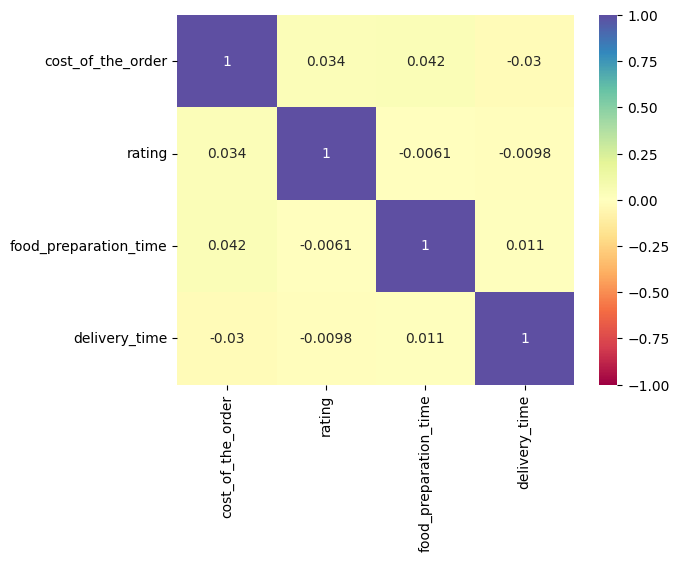

In [657]:
# ploting a heat map for numeric columns
df['rating'] = df['rating'].astype(float) # converts ratings column to integers
sns.heatmap(df[['cost_of_the_order','rating' , 'food_preparation_time', 'delivery_time']].corr(), annot=True,cmap='Spectral',vmin=-1,vmax=1)


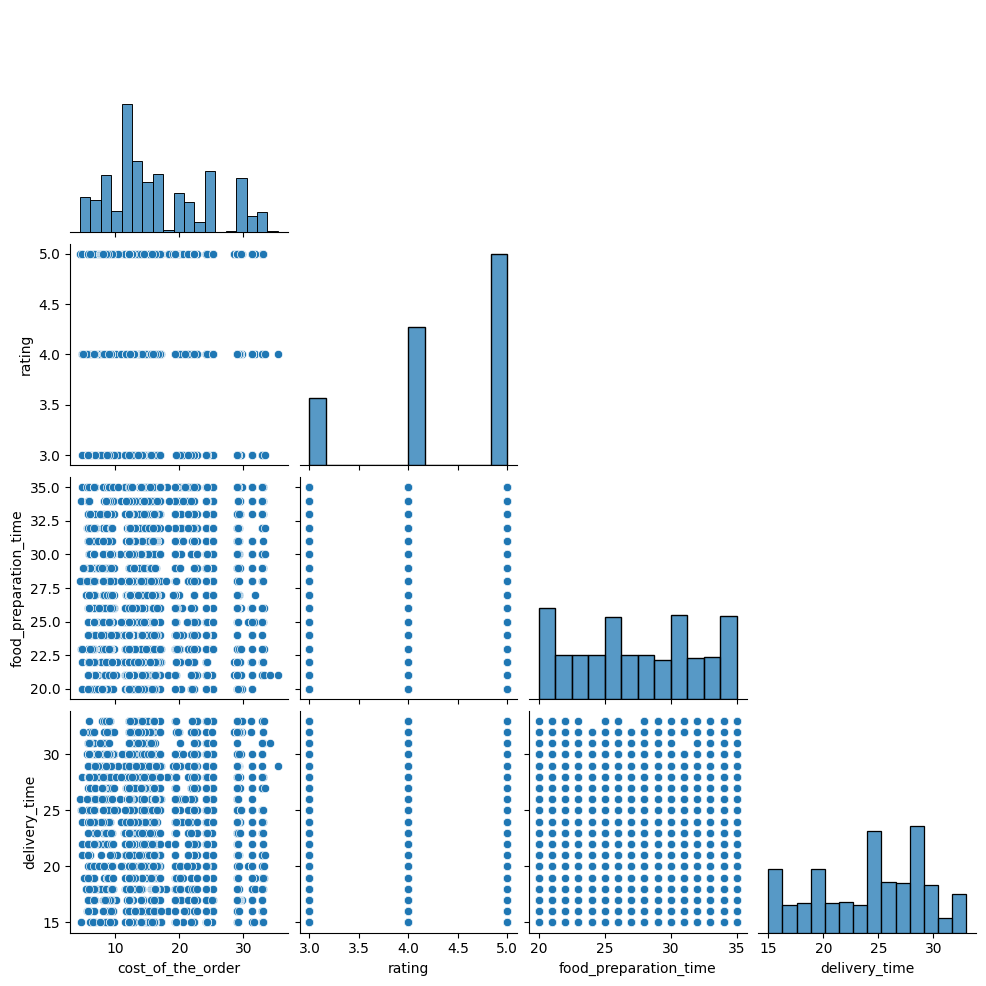

In [655]:
# ploting a pair graph for numeric columns
sns.pairplot(df, vars=['cost_of_the_order','rating' , 'food_preparation_time', 'delivery_time'], corner=True)

* the numerical values (rating, cost, prep time, delivery time) appear to have nearly zero corrolation between them

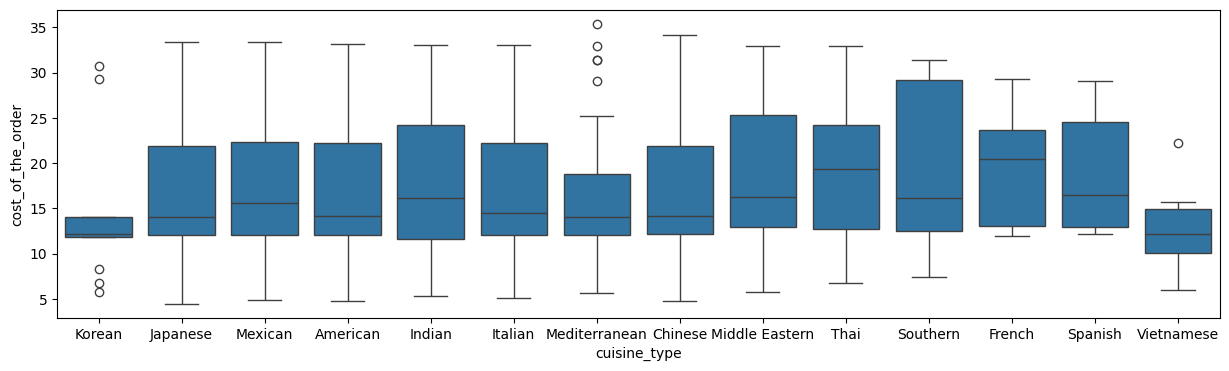

In [654]:
# ploting a box graph for cuisine_type vs cost_of_the_order
plt.figure(figsize=(15,4))
sns.boxplot(df,y='cost_of_the_order', x='cuisine_type');

In [653]:
df.groupby(['cuisine_type'])['cost_of_the_order'].describe().T # printing out descriptive data for each cuisine type

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
count,584.000000,215.000000,18.000000,73.000000,298.000000,470.000000,13.000000,46.000000,77.000000,49.000000,17.000000,12.000000,19.000000,7.000000
mean,16.319829,16.305209,19.793889,16.919726,16.418691,16.304532,14.001538,15.474783,16.933117,18.820612,19.300588,18.994167,19.207895,12.882857
std,7.462290,7.631503,6.508990,7.897493,7.268831,7.422722,7.563540,7.604720,7.555108,8.086499,7.966032,6.658207,7.579149,5.319623
min,4.710000,4.750000,11.980000,5.340000,5.050000,4.470000,5.770000,5.670000,4.850000,5.770000,7.380000,12.130000,6.690000,6.010000
25%,12.080000,12.105000,13.052500,11.640000,12.080000,12.080000,11.840000,12.092500,12.080000,12.950000,12.470000,12.915000,12.710000,10.020000
50%,14.120000,14.120000,20.470000,16.150000,14.480000,14.070000,12.180000,13.995000,15.570000,16.300000,16.110000,16.520000,19.350000,12.130000
75%,22.260000,21.880000,23.655000,24.200000,22.260000,21.830000,14.020000,18.782500,22.360000,25.270000,29.150000,24.492500,24.200000,14.870000
max,33.180000,34.190000,29.250000,33.030000,33.030000,33.370000,30.750000,35.410000,33.320000,32.930000,31.430000,29.100000,32.930000,22.260000


### Observation: 
* Customers on average spend the most at French, Southern, and Thai restaurants
* The cost of a meal at Mexican, Indian, Italian, American, Chinese, and Japanese restaurants have high variance.
* French and Spanish meals have a higher minimum cost than the rest. 
* Vietnamese and mediterranean meals have a lower maximum cost than the rest. 
* Korean meals have very small variance in order cost

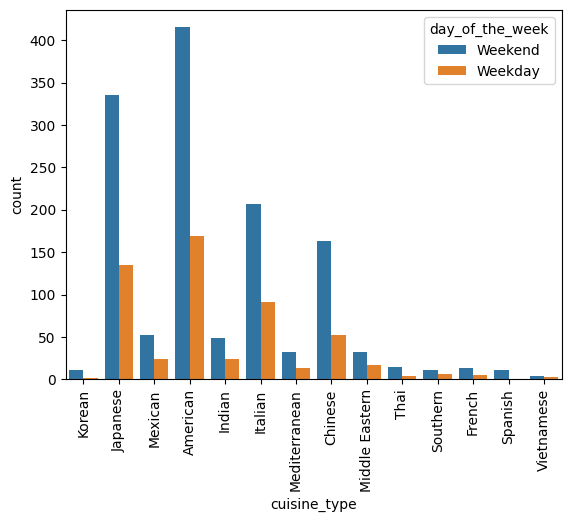

In [ ]:
# ploting a bar graph for cuisine_type vs day_of_the_week
sns.countplot(data=df,x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

### Observation: 
* Before in the Univariate, we saw that Customers on average orders twice as often on weekends as they do weekdays. Here we can see that this ratio is consistent across all cusine types
* the top 4 most frequented cuisines are the same both on weekdays and weekends; they are [American, Japanese, Italian, Chinese]


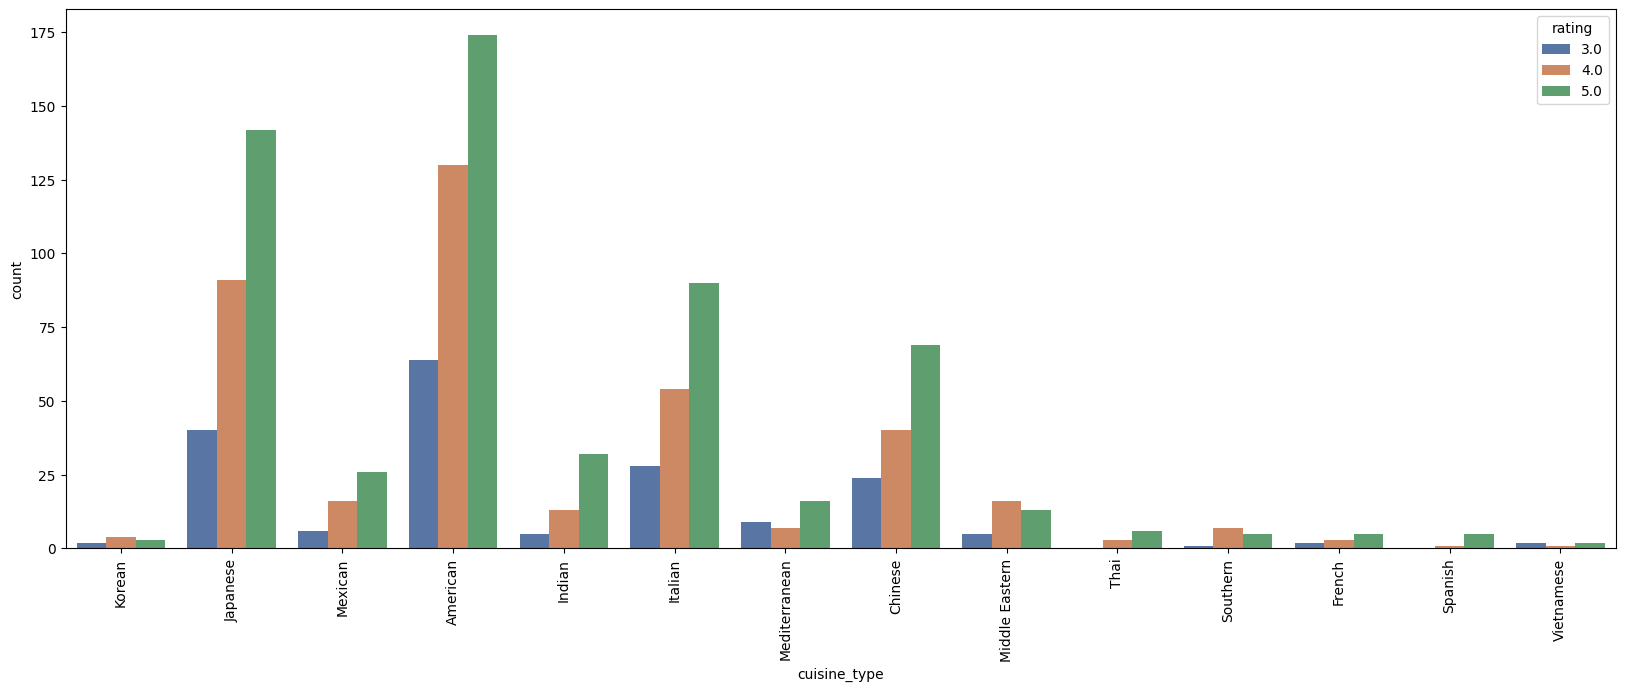

In [652]:
# ploting a bar graph for cuisine_type vs rating
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='cuisine_type', hue='rating', palette='deep')
plt.xticks(rotation=90);

### Observation: 
* arcoss the top cuisine types, we can see that there more 5 star review than 4 star and more 4 star than 3 star.
* However, towards the lower end of the spectrum we see this format breakdown.
* Southern has more 4 star than 5 stars, same goes for Korean and Middle Eastern
* Vietnamese has more 3 stars than 4 stars, same goes for Mediterranean

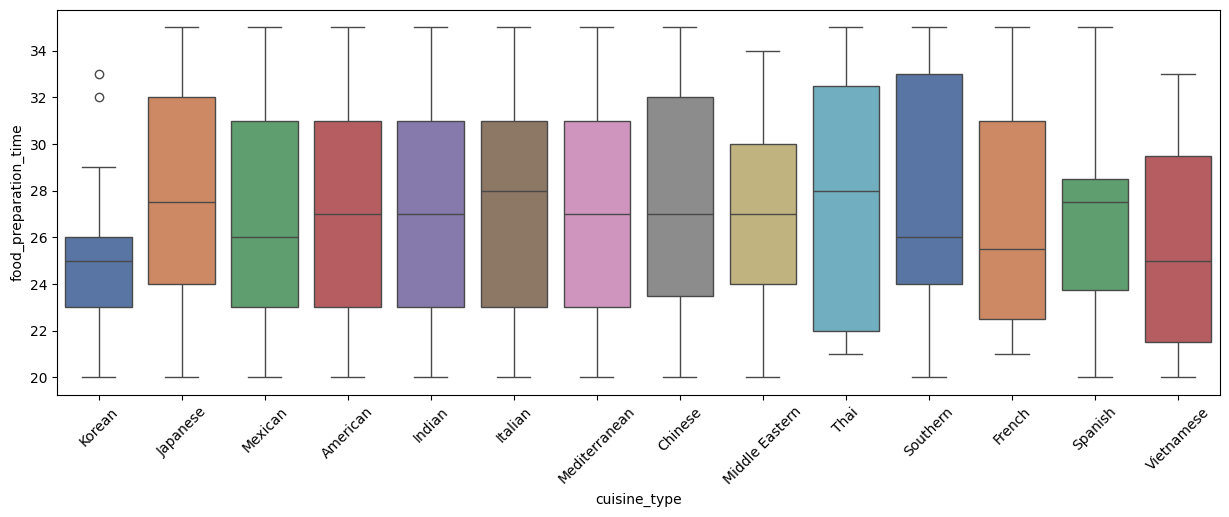

In [651]:
# ploting a box graph for cuisine_type vs food_preparation_time

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette='deep')
plt.xticks(rotation=45);

### Observation: 
* Mexican, American, Indian, Italian, and Mediterranean all have the same Interquartile Range (IQR)
* Mexican, American, Indian, Italian, Mediterranean, Japanese, Chinese, and Southern share minimum and maximum values

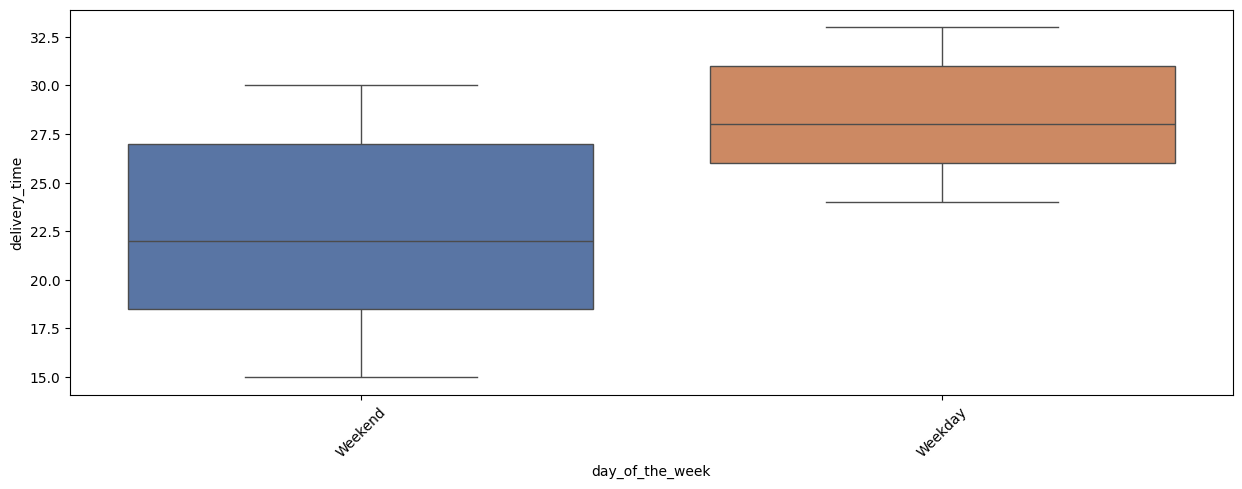

In [650]:
# ploting a box graph for day_of_the_week vs delivery_time
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='deep')
plt.xticks(rotation=45);

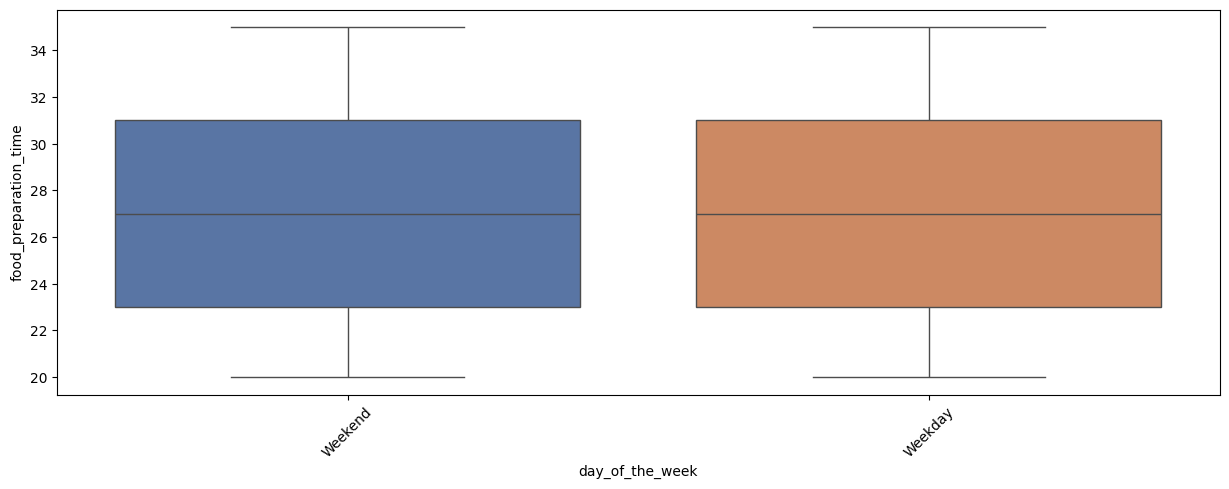

In [649]:
# ploting a box graph for day_of_the_week vs food_preparation_time
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', palette='deep')
plt.xticks(rotation=45);

### Observation: 
* delivery times are significantly increase as we go from weekends to weekdays 
* however, food prep times are not affected

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [648]:
# Write the code here

data = df.loc[df['rating'].notnull()] # limit the dataframe to only rows that have ratings

resturaunts = []

series = data['restaurant_name'].value_counts() # counts the total occurances for each restaurant 

# adds restaurants that have over 50 reviews to restaurant list
for key,val in series.items(): 
    if val <= 50:
        break
    else:
        resturaunts.append(key)

print("resturaunts with over 50 total ratings: ",resturaunts)

over_50 = data.loc[df['restaurant_name'].isin(resturaunts)] # limits the dataframe to only include rows where restaurant_name is in the resturaunts list
over_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False) # groups dataframe by restaurant_name, then finds the average rating in each group


resturaunts with over 50 total ratings:  ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']


restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations: The restaurants that meet the criteria are [The Meatball Shop, Blue Ribbon Fried Chicken , Shake Shack, Blue Ribbon Sushi]. This list is in order from highest to lowest average rating


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [647]:
# Write the code here

# calculates the revenue per order
def revenue(order):
    if order > 20: 
        return order * .25 # orders over 20 dollars return 25% of their value
    elif order > 5:
        return order * .15 # orders over 5 dollars but less than 20 return 15% of their value
    else:
        return 0 # orders less than 5 dollars return $0
    
comp_revenue= df['cost_of_the_order'].apply(revenue) # applys the revenue function to every value in the order cost column and saves the value in a revenue column
total_revenue = comp_revenue.sum() # calculates the total revenue from all orders
print("company's total revenue: " ,round(total_revenue,2))

company's total revenue:  6166.3


#### Observations: The company generated a net revenue of $6166.30.


In [646]:
print("company's revenue from one time users: " ,round(one_df['cost_of_the_order'].apply(revenue).sum(),2)) # calculating net revenue from one time users
df.loc[df['cost_of_the_order'] <= 5]['cost_of_the_order'] # returning all orders under $5

company's revenue from one time users:  2546.94


82      4.75
390     4.85
480     4.66
542     4.71
624     4.47
664     4.85
889     4.80
1569    4.75
1695    4.90
Name: cost_of_the_order, dtype: float64

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [645]:
# Write the code here

total_time = df['food_preparation_time'] + df['delivery_time'] # calculates the total time for each order
over_60 = (total_time>60).sum() # counts up all the instances where the total time is over 60 minutes
total_size= df.shape[0]     
percent_over_60 = (over_60/total_size) * 100 # the percent of rows where total time is over 60 minutes

print("percent of order that take over 60 minutes total: " ,round(percent_over_60,2)) 

percent of order that take over 60 minutes total:  10.54


#### Observations: The percent of orders that take over 60 minutes total is around 10.54% 


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [644]:
# Write the code here
week_delivery = df.groupby(['day_of_the_week'])['delivery_time'].mean() # groups the dataframe by the days of the week then gets the average delivery time for each day
print(week_delivery) # prints the average deliveries for the days of the week
print("The average difference between weekday and weekend deliveries (in minutes): ",round(week_delivery['Weekday'] - week_delivery['Weekend'],2))

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
The average difference between weekday and weekend deliveries (in minutes):  5.87


#### Observations: On average weekday deliveries are 5.87 minutes longer than weekend deliveries


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  From our observations we can see that even though the order volume on weekdays is about half that on weekends, we still see a significant increase in delivery times weekdays. Since food prep times do not change based on the days of the week, this leads me to believe the issue stems from the lack of delivery staff.
*  The company makes the majority of their net revenue ($6166.30) off of orders that are around $16 in price. Which mainly comes from the top 4 cusine types (American, Japanese, Italian, Chinese)
*  Around 39% of orders did not recieve a rating, this data could have provided necessary information when determining which resturaunts in each cuisine type should be recommended to users
*  There are 9 orders under $5 which total around $45. The company should not take a percentage of these costs as their revenue, this will hurt the resturaunts bottom line (and may lead them to leaving the app).


### Recommendations:
*  For the first conclusion, I would recommend increasing the number of weekday delivery drivers. This should help reduce the variance in delivery times between weekdays and weekends. We may even see an increase in weekday orders due to the improved customer experience.
*  For the second concluson, I would recommend increasing visabilty in the app for resturaunts that serve the top 4 ordered cuisine types (American, Japanese, Italian, Chinese). This should increase net revenue.
*  For the third conclusion, I would recommend adding a voucher/discount incentive to users who rate their orders in order to increase the amount of usable data from ratings.
*  For the fourth conclusion, I would recommend charging a flat rate for deliveries on small orders. This way both the resturaunts and company get to make a profit on small orders.


---